#### Data Import 

In [29]:
# Imports
import pandas as pd
import warnings
from helpers import * 

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    # Import entities / skills / wikipedia
    entities = pd.read_csv("../data/classeek_entities.csv")
    skills = pd.read_csv("../data/classeek_skills.csv")
    alt_names = pd.read_csv("../data/classeek_alternative_names.csv")
    performances = pd.read_csv("../data/classeek_performances.csv")
    pieces = pd.read_csv("../data/classeek_pieces.csv")
    wikipedia_pv = pd.read_csv("../data/classeek_wikipedia_page_views.csv")
    mediamentions = pd.read_csv("../data/classeek_media_mentions.csv")
    biographies = pd.read_csv("../data/classeek_biographies.csv")

    entities_performances = pd.read_csv("../data/classeek_entities_performances.csv")
    entities_pieces = pd.read_csv("../data/classeek_entities_pieces.csv")
    entities_skills = pd.read_csv("../data/classeek_entity_skills.csv")

# 
# Renaud Capuçon 
#### Entity ID : 'd414cdfd-b2c4-4d9f-adce-7c1a6d03d162'

In [30]:
entity_id = 'd414cdfd-b2c4-4d9f-adce-7c1a6d03d162'

## Basic Informations 

In [31]:
# Basic information about the entity 
entity_info = get_info(entity_id, entities, entities_performances, entities_pieces, entities_skills, mediamentions, 
             wikipedia_pv, biographies, alt_names, include_lists = True)
infos = ['id', 'name', 'gender', 'alive', 'birth_date', 'death_date', 'current_influence_percentile']
entity_info.iloc[:, 0:7]

,id,name,gender,alive,birth_date,death_date,current_influence_percentile
145377,d414cdfd-b2c4-4d9f-adce-7c1a6d03d162,Renaud Capuçon,NaN,True,NaN,NaN,99.0


In [32]:
# Number of cells in other tables linked to that entity 
entity_info.iloc[:, 7:13]

,nb_perf,nb_pieces,nb_media_mentions,nb_skills,nb_alt_names,nb_biographies
145377,464,539,265,1,5,14


## 1 - Performances 

In [33]:
# Extract performances 
df_perfs = performances[performances.id.apply(lambda x : x in entity_info.perf_list.to_list()[0])].loc[:, ['date', 'venue', 'country', 'city', 'title', 'key', 'continent']]
df_perfs.head(10)

,date,venue,country,city,title,key,continent
80,2020-08-08 22:30:00.000000,Wolkenturm,Austria,Grafenegg,Glamour and dance,NaN,Europe
1015,2016-01-24 19:00:00.000000,Barbican Hall,United Kingdom,London,Strauss Ein Heldenleben,NaN,Europe
1116,2018-03-25 19:00:00.000000,Barbican Hall,United Kingdom,London,Debussy and Beyond,NaN,Europe
1336,2021-06-16 20:30:00.000000,Grande salle Pierre Boulez - Philharmonie,France,NaN,Orchestre de Paris / Michael Tilson Thomas,NaN,Europe
1337,2021-06-17 20:30:00.000000,Grande salle Pierre Boulez - Philharmonie,France,NaN,Orchestre de Paris / Michael Tilson Thomas,NaN,Europe
1574,2016-01-19 21:00:00.000000,Salle des concerts - Cité de la musique,France,NaN,Hommage à Adolf Busch,NaN,Europe
1623,2017-03-13 20:30:00.000000,Grande salle Pierre Boulez - Philharmonie,France,NaN,Brahms sonates,NaN,Europe
1774,2018-03-26 20:30:00.000000,Grand Théâtre de Provence,France,NaN,Debussy La mer: Aix en Provence,NaN,Europe
2004,2019-01-07 20:30:00.000000,Grande salle Pierre Boulez - Philharmonie,France,NaN,Ivry Gitlis & friends,NaN,Europe
2043,2021-06-15 20:30:00.000000,Grande salle Pierre Boulez - Philharmonie,France,NaN,Tour du monde Saint-Saëns,NaN,Europe


## 2 - Pieces 

In [34]:
df_pieces = pieces[pieces.id.apply(lambda x : x in entity_info.pieces_list.to_list()[0])]
df_pieces.loc[:, ['composer', 'title', 'source']].head(10)

,composer,title,source
396,Béla Bartók (18811945),"Violin Concerto No. 2, Sz. 112",3
397,Igor Stravinsky (18821971),The Song of the Nightingale,3
398,Claude Debussy (18621918),"The Sea, three symphonic sketches for orchestra",3
411,Robert Schumann (1810-1856),"Piano Quartet in E flat major, Op. 47",3
412,Thierry Escaich (born 1965),World premiere for strings sextet (commissione...,3
413,Johannes Brahms (1833-1897),Hungarian Dances (for piano four hands),3
414,César Franck (1822-1897),"Piano Quintet in F Minor, FWV 7",3
415,Hector Berlioz (1803-1869),"Le Carnaval romain, Op.9",3
416,Felix Mendelssohn (1809-1847),"Violin Concerto in E minor, Op. 64",3
417,Antonín Dvořák (1841-1904),"Symphony No. 9 in E minor, ""From the New World...",3


## 3 - Media mentions 

In [35]:
df_medias = mediamentions[mediamentions.id.apply(lambda x : x in entity_info.media_mentions.to_list()[0])]
df_medias.loc[:, ['comparable_text', 'url', 'header_text']].head(10)

,comparable_text,url,header_text
44856,The best new classical albums – June 2017,https://www.gramophone.co.uk/features/article/...,The best new classical albums – June 2017
178640,"Au Festival de Menton, Fazil Say en archange ...",https://www.lemonde.fr/musiques/article/2017/0...,"Au Festival de Menton, Fazil Say en archange d..."
178834,"A Verbier, il pleut aussi des stars Depuis sa...",https://www.lemonde.fr/musiques/article/2017/0...,"A Verbier, il pleut aussi des stars"
178950,"A Aix, les doigts de fée de Martha Argerich D...",https://www.lemonde.fr/culture/article/2014/04...,"A Aix, les doigts de fée de Martha Argerich"
179417,La jeune garde chambriste fête Pâques à Deauv...,https://www.lemonde.fr/archives/article/1998/0...,La jeune garde chambriste fête Pâques à Deauville
179418,Carnet de notes (2) C’est à voir. Chaque anné...,https://www.lemonde.fr/idees/article/2014/02/0...,Carnet de notes (2)
179419,Les caciques favoris Aux Victoires de la musi...,https://www.lemonde.fr/idees/article/2013/02/2...,Les caciques favoris
179420,L'ascension fulgurante du chef d'orchestre Ya...,https://www.lemonde.fr/culture/article/2010/09...,L'ascension fulgurante du chef d'orchestre Yan...
179421,Le chef Paavo Järvi dirige Brahms et déçoit P...,https://www.lemonde.fr/culture/article/2007/10...,Le chef Paavo Järvi dirige Brahms et déçoit
179422,"Bach, les soeurs Labèque, les Jackson Five : ...",https://www.lemonde.fr/culture/article/2006/05...,"Bach, les soeurs Labèque, les Jackson Five : l..."


In [36]:
# One example of media mention
df_medias.iloc[2].comparable_text

' A Verbier, il pleut aussi des stars Depuis sa création en 1994, le festival suisse, qui accueille monstres sacrés et jeunes prodiges, ouvre sous la pluie. '

## 4 - Wikipedia Page Views 

In [37]:
df_wiki = wikipedia_pv[wikipedia_pv.id.apply(lambda x : x in entity_info.wiki_pv.to_list()[0])]
df_wiki.loc[:, ['en', 'fr', 'de', 'it', 'ru', 'period_start_date']].head(5)

,en,fr,de,it,ru,period_start_date
11236,1399.0,8618.0,298.0,75.0,NaN,2015-10-01
11237,1360.0,4573.0,205.0,72.0,NaN,2015-11-01
11238,1004.0,16433.0,300.0,65.0,NaN,2015-12-01
11239,1297.0,15794.0,668.0,76.0,NaN,2016-01-01
11240,1854.0,34104.0,525.0,116.0,NaN,2016-02-01


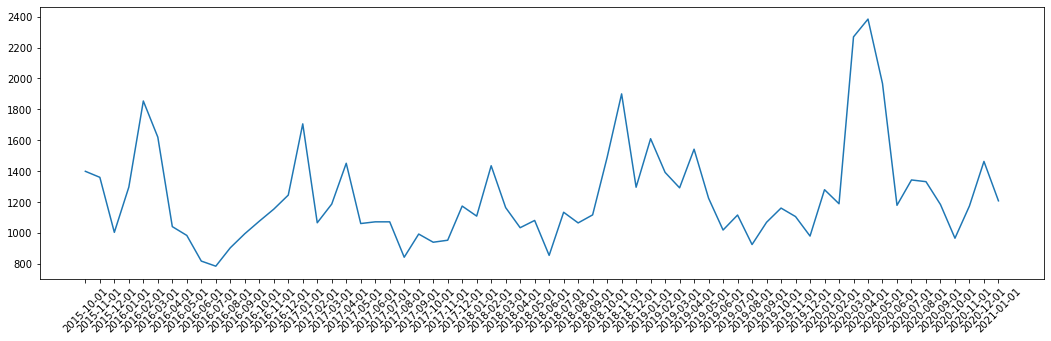

In [38]:
import matplotlib.pyplot as plt
x = df_wiki.period_start_date.to_list()
y = df_wiki.en.to_list()
plt.figure(figsize=[18, 5])
plt.xticks(rotation=45)
plt.plot(x, y)

## 5 - Skills 

In [39]:
df_skills = skills[skills.id.apply(lambda x : x in entity_info.skills_list.to_list()[0])]
df_skills.loc[:, ['name']]

,name
57,Violinist


## 6 - Alternative Names 

Alternative names are the names used by developpers to map down several entities to one during scraping operations. They are not related to the aliases found with fuzzy string matching during cleaning. 

In [40]:
entity_info.alter_names.to_list()

[['capuçon renaud',
  'renaud capucon',
  'renaud capuçon',
  'renaud capuçon, violon**',
  'renaud capuçon, violin']]

## 7 - Biographies 

In [41]:
df_bios = biographies[biographies.id.apply(lambda x : x in entity_info.bios_list.to_list()[0])]
df_bios.loc[:, ['detail', 'year', 'source']].sample(10)

,detail,year,source
31385,"Né à Chambéry en 1976, Renaud Capuçon étudie a...",2020,35
55573,French violinist Renaud Capuçon is firmly esta...,1976,4
145,French violinist Renaud Capuçon is firmly esta...,2018,14
9312,French violinist Renaud Capuçon is firmly esta...,2019,14
46860,"Born in Chambéry in 1976, Renaud Capuçon bega...",2018,20
847,French violinist Renaud Capuçon is firmly esta...,1976,4
20044,"Né à Chambéry en 1976, Renaud Capuçon étudie a...",2019,35
39572,French violinist Renaud Capuçon is firmly esta...,2018,12
31212,French violinist Renaud Capuçon is firmly esta...,1976,4
13837,French violinist Renaud Capuçon is one of the ...,2018,20


In [42]:
# One bography example 
df_bios.iloc[0].detail

"French violinist Renaud Capuçon is firmly established internationally as a major soloist, recitalist and chamber musician. He is known and loved for his poise, depth of tone and virtuosity, and he works with the world’s most prestigious orchestras, artists, venues and festivals. \nBorn in Chambéry in 1976, Renaud Capuçon began his studies at the Conservatoire National Supérieur de Musique de Paris at the age of fourteen, winning numerous awards during his five years there. Following this, Capuçon moved to Berlin to study with Thomas Brandis and Isaac Stern and was awarded the Prize of the Berlin Academy of Arts. In 1997, he was invited by Claudio Abbado to become concert master of the Gustav Mahler Jugendorchester, which he led for three summers, working with conductors including Boulez, Ozawa, Welser-Möst and Claudio Abbado. \nSince then, Capuçon has established himself as a soloist at the very highest level. He performs with leading orchestras such as the Berliner Philharmoniker, Wi